In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the necessary packages
from imutils import contours
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt

In [3]:
# define a dictionary that maps the first digit of a credit card
# number to the credit card type
FIRST_NUMBER = {
    "3": "American Express",
    "4": "Visa",
    "5": "MasterCard",
    "6": "Discover Card"
}

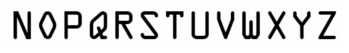

In [4]:
# load the reference OCR-A image from disk, convert it to grayscale,
# and threshold it, such that the digits appear as *white* on a
# *black* background
# and invert it, such that the digits appear as *white* on a *black*
ref = cv2.imread("ocr_a_reference.png")
ref1 = cv2.imread("FONTS/OCR-A_2.png")

plt.figure()
plt.axis("off")
plt.imshow(ref1)

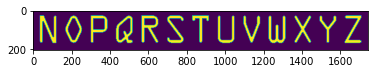

In [5]:
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]
ref1 = cv2.cvtColor(ref1, cv2.COLOR_BGR2GRAY)
ref1 = cv2.threshold(ref1, 10, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(ref)
plt.imshow(ref1)
plt.show()

In [6]:
# find contours in the OCR-A image (i.e,. the outlines of the digits)
# sort them from left to right, and initialize a dictionary to map
# digit name to the ROI
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
refCnts = refCnts[1] if imutils.is_cv3() else refCnts[0]
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]

refCnts1 = cv2.findContours(ref1.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
refCnts1 = refCnts1[1] if imutils.is_cv3() else refCnts1[0]
refCnts1 = contours.sort_contours(refCnts1, method="left-to-right")[0]

In [7]:
digits = {}
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [8]:
# loop over the OCR-A reference contours
i = 0
for c in refCnts:
    # compute the bounding box for the digit, extract it, and resize
    # it to a fixed size
    (x, y, w, h) = cv2.boundingRect(c)
    roi = ref[y:(y + h), x:(x + w)]
    roi2 = cv2.resize(roi, (57, 88))
    print(digits)
    # update the digits dictionary, mapping the digit name to the ROI
    digits[i] = roi
    i+=1
    
# for  c in refCnts1:
#     # compute the bounding box for the digit, extract it, and resize
#     # it to a fixed size
#     (x, y, w, h) = cv2.boundingRect(c)
#     roi = ref1[y:(y + h), x:(x + w)]
#     roi2 = cv2.resize(roi, (57, 88))
#     print(digits)
#     # update the digits dictionary, mapping the digit name to the ROI
#     digits[i] = roi
#     i+=1


{}
{0: array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}
{0: array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1: array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       ...,
       [  0, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255,   0,   0]], dtype=uint8)}
{0: array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1: array([[  0,   0,   0, ...,   0

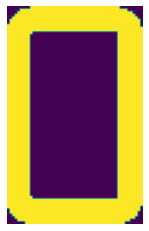

In [9]:
plt.figure()
plt.axis("off")
plt.imshow(digits[0])

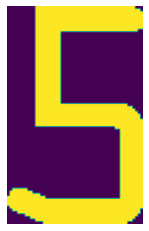

In [10]:
plt.figure()
plt.axis("off")
plt.imshow(digits[5])

In [11]:
# initialize a rectangular (wider than it is tall) and square
# structuring kernel
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

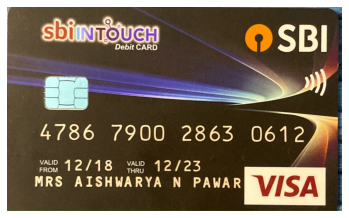

In [12]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread("test33.png")
org = image.copy()
plt.figure()
plt.axis("off")
plt.imshow(image)

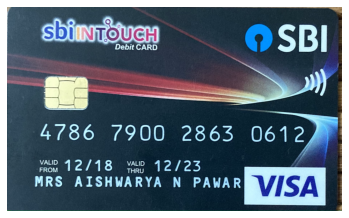

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.figure()
plt.axis("off")
plt.imshow(image)

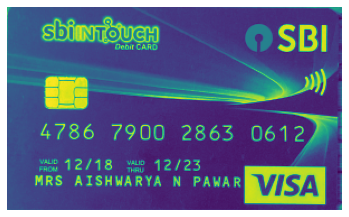

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_og = gray.copy()
image = imutils.resize(image, width=300)

aspect_ratio = org.shape[0]/image.shape[0]

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.axis("off")
plt.imshow(gray)

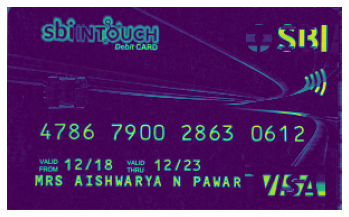

In [15]:
# apply a tophat (whitehat) morphological operator to find light
# regions against a dark background (i.e., the credit card numbers)
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
plt.figure()
plt.axis("off")
plt.imshow(tophat)

In [16]:
# compute the Scharr gradient of the tophat image, then scale
# the rest back into the range [0, 255]
gradX = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
gradX = gradX.astype("uint8")

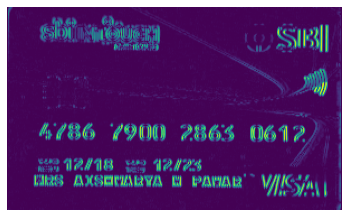

In [17]:
plt.figure()
plt.axis("off")
plt.imshow(gradX)

In [18]:
# apply a closing operation using the rectangular kernel to help
# cloes gaps in between credit card number digits, then apply
# Otsu's thresholding method to binarize the image
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(gradX, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [19]:
# apply a second closing operation to the binary image, again
# to help close gaps between credit card number regions
import numpy as np
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
#kernel = np.ones((4,4))
#thresh = cv2.erode(thresh,kernel,iterations = 1)

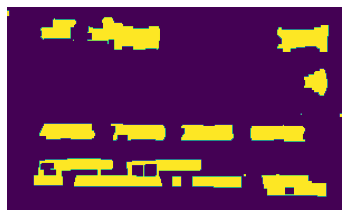

In [20]:
plt.figure()
plt.axis("off")
plt.imshow(thresh)

In [21]:
# find contours in the thresholded image, then initialize the
# list of digit locations
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[1] if imutils.is_cv3() else cnts[0]



# cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [22]:
locs = []

(166, 152, 44, 10)


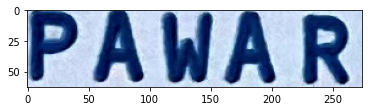

(148, 152, 8, 9)


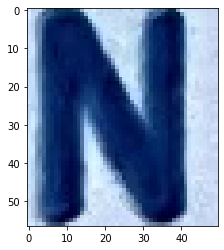

(228, 150, 58, 20)


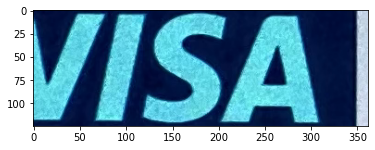

(212, 150, 2, 2)


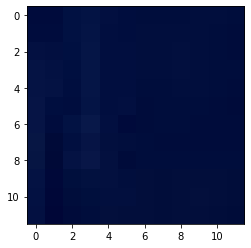

(24, 136, 150, 25)


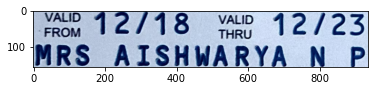

(218, 106, 49, 15)


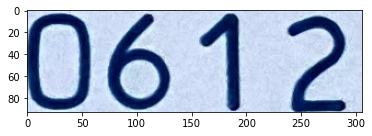

(156, 106, 47, 14)


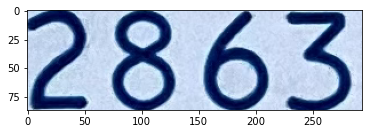

(93, 105, 49, 15)


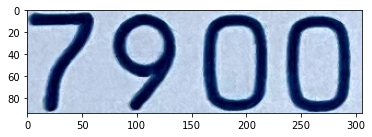

(29, 105, 50, 14)


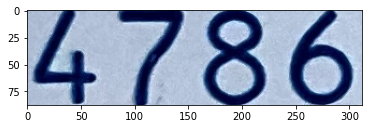

(298, 96, 2, 3)


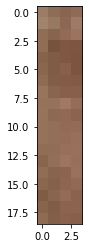

(263, 96, 1, 1)


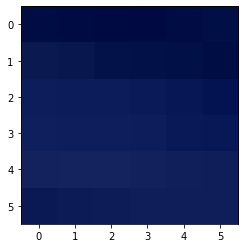

(266, 56, 21, 24)


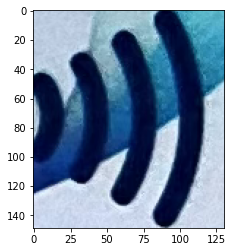

(59, 30, 1, 1)


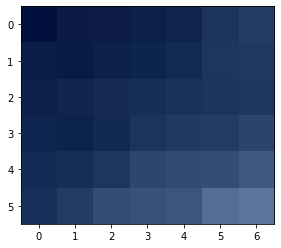

(242, 17, 46, 24)


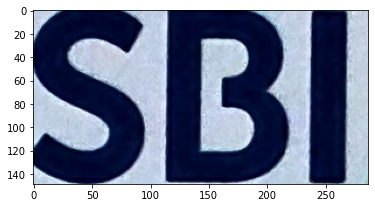

(30, 11, 32, 19)


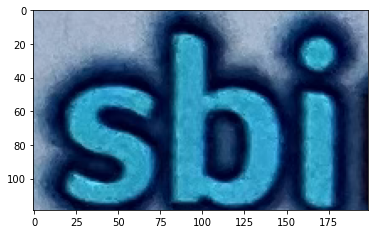

(72, 10, 65, 29)


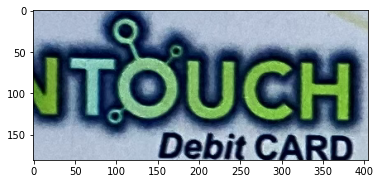

(0, 4, 2, 5)


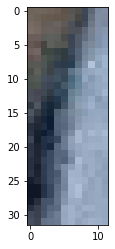

[]


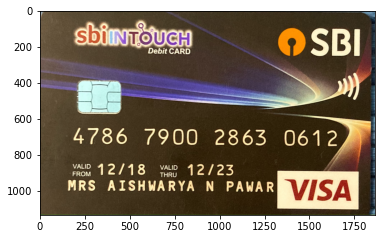

In [23]:
# loop over the contours
results = []
for c in cnts:
#     print(i,c)
    # compute the bounding box of the contour, then use the
    # bounding box coordinates to derive the aspect ratio
    (x, y, w, h) = cv2.boundingRect(c)
    print(    (x, y, w, h))
    
    startX = int(x*aspect_ratio)
    startY =int(y*aspect_ratio) 
    endX = int((x+w)*aspect_ratio)
    endY = int((y+h)*aspect_ratio)

	#extract the region of interest
    r = org[startY:endY, startX:endX]
    r = cv2.bitwise_not(r)

#     ret,r = cv2.threshold(r,100,255,cv2.THRESH_BINARY)
	#configuration setting to convert image to string.  
    configuration = ("-l eng --oem 1 --psm 8")
    ##This will recognize the text from the image of bounding box
    #text = pytesseract.image_to_string(r, config=configuration)

	# append bbox coordinate and associated text to the list of results 
    #results.append(text)
    
    
    plt.imshow(r)
    plt.show()
#     cv2.rectangle(org, (startX,startY),
#               (endX,endY), (0, 0, 255), 4)
    
    ar = w / float(h)
 
    # since credit cards used a fixed size fonts with 4 groups
    # of 4 digits, we can prune potential contours based on the
    # aspect ratio
    if  ar > 2.5 and ar < 4.5:
        # contours can further be pruned on minimum/maximum width
        # and height
        if  (int(w*aspect_ratio) > int(40*aspect_ratio) and int(w*aspect_ratio) < int(70*aspect_ratio)) and (int(h*aspect_ratio) > int(10*aspect_ratio) and int(h*aspect_ratio) < int(20*aspect_ratio)):
            # append the bounding box region of the digits group
            # to our locations list
            locs.append((x, y, w, h))
plt.imshow(org)
print(results)

In [24]:
# sort the digit locations from left-to-right, then initialize the
# list of classified digits
locs = sorted(locs, key=lambda x:x[0])

In [25]:
locs

[(29, 105, 50, 14), (93, 105, 49, 15), (156, 106, 47, 14), (218, 106, 49, 15)]

In [26]:
# Digit Classifier
def predict(model, X):
    Y = model.predict(X)
    Y = np.argmax(Y, axis=1)
    return Y

In [27]:
from keras.models import Sequential
from keras.models import model_from_json

def run_preds(img):
    img = cv2.resize(img, (28, 28))
    img = img.reshape(1, 28, 28, 1)
    
    model_file = open('/Users/anishpawar/Downloads/Credit-Card-Number-Recognition-master-2/Digit-Classifier-master/Data/Model/model.json', 'r')
    model = model_file.read()
    model_file.close()
    model = model_from_json(model)
    # Getting weights
    model.load_weights("/Users/anishpawar/Downloads/Credit-Card-Number-Recognition-master-2/Digit-Classifier-master/Data/Model/weights.h5")
    print(predict(model, img))

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [1898]:
output = []
for (i, (gX, gY, gW, gH)) in enumerate(locs):
    print(i,(gX, gY, gW, gH))

0 (29, 105, 50, 14)
1 (93, 105, 49, 15)
2 (156, 106, 47, 14)
3 (218, 106, 49, 15)


(29, 105, 50, 14)


NameError: name 'model_from_json' is not defined

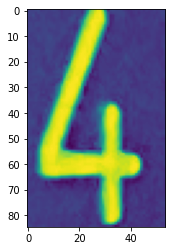

In [1899]:
# loop over the 4 groupings of 4 digits
import pytesseract
from pytesseract import Output

for (gX, gY, gW, gH) in locs:
    print((gX, gY, gW, gH))
    groupOutput = []
    group = gray_og[int((gY)*aspect_ratio) :int((gY + gH)*aspect_ratio) , int((gX)*aspect_ratio) :int((gX + gW)*aspect_ratio)]
    
#     group = cv2.adaptiveThreshold(group,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,111,2)
    
#     plt.imshow(group)
#     group = cv2.threshold(group, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#     print(gY,gX)
#     digitCnts = cv2.findContours(group.copy(), cv2.RETR_EXTERNAL,
#     cv2.CHAIN_APPROX_SIMPLE)
    
#     digitCnts = digitCnts[1] if imutils.is_cv3() else digitCnts[0]

#     digitCnts = contours.sort_contours(digitCnts,
#     method="left-to-right")[0]

    width = group.shape[1]
    digitsk = [group[:,0:int(width*0.25)],group[:,int(width*0.25):int(width*0.5)],group[:,int(width*0.5):int(width*0.75)],group[:,int(width*0.75):]]

    for c in digitsk:

#         (x, y, w, h) = cv2.boundingRect(c)
#         roi = group[y:y + h, x:x + w]
        roi = cv2.resize(c, (54, 85))
        plt.imshow(roi)
        run_preds(roi)

        test = cv2.resize(roi,(28,28))
        cv2.imwrite("Test.jpg",test)
        
        print(digitROI.shape)
    #         plt.imshow(digitROI)        
        plt.show()
            
        scores = []
#         print(digits)
        for (digit, digitROI) in digits.items():
            result = cv2.matchTemplate(roi, digitROI,
                                       cv2.TM_CCOEFF)
            (_, score, _, _) = cv2.minMaxLoc(result)

            scores.append(score)
        
        groupOutput.append(str(np.argmax(scores)))
        cv2.rectangle(image, (gX - 5, gY - 5),
                      (gX + gW + 5, gY + gH + 5), (0, 0, 255), 2)
        cv2.putText(image, "".join(groupOutput), (gX, gY - 15),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1) 
    output.extend(groupOutput)
print(len(groupOutput))

In [1862]:
#print("Credit Card Type: {}".format(FIRST_NUMBER[output[0]]))

In [1863]:
print("Credit Card #: {}".format("".join(output)))

Credit Card #: 878514442853481887851444285348187785144418514818


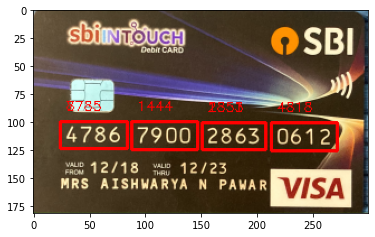

In [1864]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
